In [88]:
'''
Basic example originally from https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py

Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

'\nBasic example originally from https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py\n\nTrains a simple deep NN on the MNIST dataset.\n\nGets to 98.40% test accuracy after 20 epochs\n(there is *a lot* of margin for parameter tuning).\n2 seconds per epoch on a K520 GPU.\n'

# FeedForward Network

In [89]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout 
from keras.optimizers import RMSprop
from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt
import numpy as np

## Prepare Data

In [90]:
batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'Total train samples')
print(x_test.shape[0], 'Total test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 Total train samples
10000 Total test samples


## Test Models

In [91]:
def test_model(sample_count):
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
#     model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
#     model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

#     random_indeces = np.arange(len(x_train))
#     np.random.shuffle(random_indeces)
#     x_train = x[random_indeces]
#     y_train = y[random_indeces]

    x_train_small = x_train[:][:sample_count]
    y_train_small = y_train[:][:sample_count]
    print('Training Shape:', x_train_small.shape)

    model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

    training = model.fit(x_train_small, y_train_small,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))


    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print(training.history)
    training.history['acc'] = 100.0 * np.array(training.history['acc']) # Convert to percent
    training.history['val_acc'] = 100.0 * np.array(training.history['val_acc']) # Convert to percent
    print(training.history)
    
    return training

In [92]:
sixty = test_model(60)
six_hundred = test_model(600)
six_thousand = test_model(6000)
sixty_thousand = test_model(60000)

Training Shape: (60, 784)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_93 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_94 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60 samples, validate on 10000 samples
Epoch 1/20
60/60 [==============================] - 1s 23ms/step - loss: 2.3476 - acc: 0.0667 - val_loss: 1.9949 - val_acc: 0.3512
Epoch 2/20
60/60 [==============================] - 0s 5ms/step - loss: 1.4223 - acc: 0.5500 - val_loss: 1.6514 - val_acc: 0.4686
Epoch 3/20
60/60 [==============================] - 0s 4ms/step - 

600/600 [==============================] - 0s 475us/step - loss: 0.0188 - acc: 1.0000 - val_loss: 0.4380 - val_acc: 0.8710
Epoch 12/20
600/600 [==============================] - 0s 491us/step - loss: 0.0149 - acc: 1.0000 - val_loss: 0.4891 - val_acc: 0.8629
Epoch 13/20
600/600 [==============================] - 0s 485us/step - loss: 0.0092 - acc: 1.0000 - val_loss: 0.4682 - val_acc: 0.8672
Epoch 14/20
600/600 [==============================] - 0s 468us/step - loss: 0.0074 - acc: 1.0000 - val_loss: 0.5216 - val_acc: 0.8600
Epoch 15/20
600/600 [==============================] - 0s 484us/step - loss: 0.1853 - acc: 0.9700 - val_loss: 0.9760 - val_acc: 0.8120
Epoch 16/20
600/600 [==============================] - 0s 494us/step - loss: 0.0828 - acc: 0.9800 - val_loss: 0.4730 - val_acc: 0.8710
Epoch 17/20
600/600 [==============================] - 0s 490us/step - loss: 0.0063 - acc: 1.0000 - val_loss: 0.4788 - val_acc: 0.8714
Epoch 18/20
600/600 [==============================] - 0s 500us/ste

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.2190 - acc: 0.9319 - val_loss: 0.1166 - val_acc: 0.9625
Epoch 2/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0829 - acc: 0.9745 - val_loss: 0.0754 - val_acc: 0.9771
Epoch 3/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0534 - acc: 0.9833 - val_loss: 0.1008 - val_acc: 0.9709
Epoch 4/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0384 - acc: 0.9880 - val_loss: 0.0795 - val_acc: 0.9796
Epoch 5/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0294 - acc: 0.9906 - val_loss: 0.0874 - val_acc: 0.9792
Epoch 6/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0226 - acc: 0.9928 - val_loss: 0.1057 - val_acc: 0.9740
Epoch 7/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0183 - acc: 0.9944 - val_loss: 0.0899 - val_ac

## Plotting

[  6.66666701  55.00000119  85.00000238  78.33333611  98.33333492
  89.99999762 100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.        ]


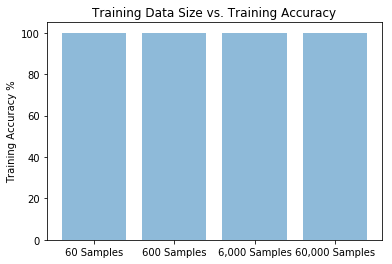

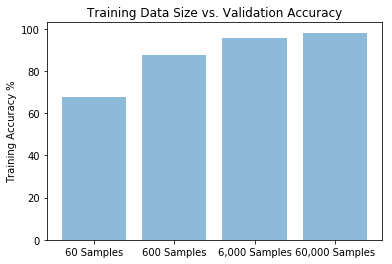

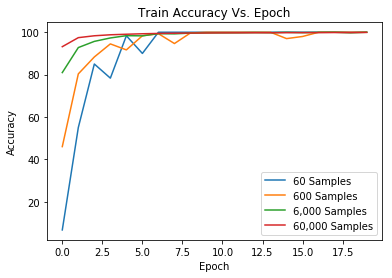

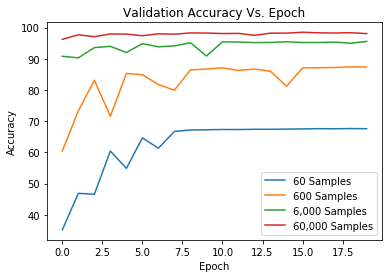

In [93]:
plt.figure(0)
plt.title('Training Data Size vs. Training Accuracy')
plt.ylabel('Training Accuracy %')

bar_titles = ('60 Samples', '600 Samples', '6,000 Samples', '60,000 Samples')
accuracy = [sixty.history['acc'][-1],
            six_hundred.history['acc'][-1], 
            six_thousand.history['acc'][-1], 
            sixty_thousand.history['acc'][-1]]

x_nums = np.arange(len(bar_titles))
plt.bar(x_nums, accuracy, align='center', alpha=0.5)
plt.xticks(x_nums, bar_titles)

plt.figure(1)
plt.title('Training Data Size vs. Validation Accuracy')
plt.ylabel('Training Accuracy %')

bar_titles = ('60 Samples', '600 Samples', '6,000 Samples', '60,000 Samples')
accuracy = [sixty.history['val_acc'][-1],
            six_hundred.history['val_acc'][-1], 
            six_thousand.history['val_acc'][-1], 
            sixty_thousand.history['val_acc'][-1]]

x_nums = np.arange(len(bar_titles))
plt.bar(x_nums, accuracy, align='center', alpha=0.5)
plt.xticks(x_nums, bar_titles)


# plt.title("Training Data Size vs. Training Accuracy")
# plt.xlabel('Training Data Size')
# plt.ylabel('Training Accuracy %')
# x = [600, 6000, 60000]
# y = [six_hundred.history['acc'][-1], six_thousand.history['acc'][-1], sixty_thousand.history['acc'][-1]]
# plt.bar(x, y, width=100)

plt.figure(2)
plt.title("Train Accuracy Vs. Epoch")
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')
# summarize history for accuracy  
plt.plot(sixty.history['acc']) 
print(sixty.history['acc'])
plt.plot(six_hundred.history['acc']) 
plt.plot(six_thousand.history['acc']) 
plt.plot(sixty_thousand.history['acc'])
plt.legend(['60 Samples', '600 Samples', '6,000 Samples', '60,000 Samples'], loc='lower right') 

plt.figure(3)
plt.title("Validation Accuracy Vs. Epoch")
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')
# summarize history for accuracy
plt.plot(sixty.history['val_acc']) 
plt.plot(six_hundred.history['val_acc']) 
plt.plot(six_thousand.history['val_acc']) 
plt.plot(sixty_thousand.history['val_acc'])
plt.legend(['60 Samples', '600 Samples', '6,000 Samples', '60,000 Samples'], loc='lower right') 